## Data Pipeline Using Python - DATA622 HW 2
### Sharon Morris
#### September 25, 2018

## Data Pipeline

Titanic dataset

Training dataset url: https://www.kaggle.com/c/titanic/download/train.csv
Scoring dataset url: https://www.kaggle.com/c/titanic/download/test.csv

In [417]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.grid_search

In [418]:
'''Read train dataset'''
train_url = 'https://raw.githubusercontent.com/indianspice/DATA622/master/HW2/train.csv'
train_df = pd.read_csv(train_url, sep=',')

train_df.head()

'''Read test dataset'''
test_url = 'https://raw.githubusercontent.com/indianspice/DATA622/master/HW2/test.csv'
test_df = pd.read_csv(test_url, sep=',')

test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [419]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [420]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Preprocess the data

In [421]:
def preprocess_data(df):
    convert_dummy = ['Sex', 'Embarked']
    drop_column = ['Name', 'Ticket', 'Cabin']
    rename_column = ['Pclass', 'SibSp', 'Parch']
    for col in convert_dummy:
        new_column = pd.get_dummies(df[col])
        df = df.join(new_column)
    df = df.drop(convert_dummy, axis=1)
    df = df.rename(columns={'Pclass':'Ticket_Class', 'SibSp':'#Sibling_Spouse', 
                                        'Parch':'#Parents_Children'})
    return df.drop(drop_column, axis=1)

In [422]:
train = preprocess_data(train_df)
train.head()

,PassengerId,Survived,Ticket_Class,Age,#Sibling_Spouse,#Parents_Children,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [423]:
train.isnull().sum()

PassengerId            0
Survived               0
Ticket_Class           0
Age                  177
#Sibling_Spouse        0
#Parents_Children      0
Fare                   0
female                 0
male                   0
C                      0
Q                      0
S                      0
dtype: int64

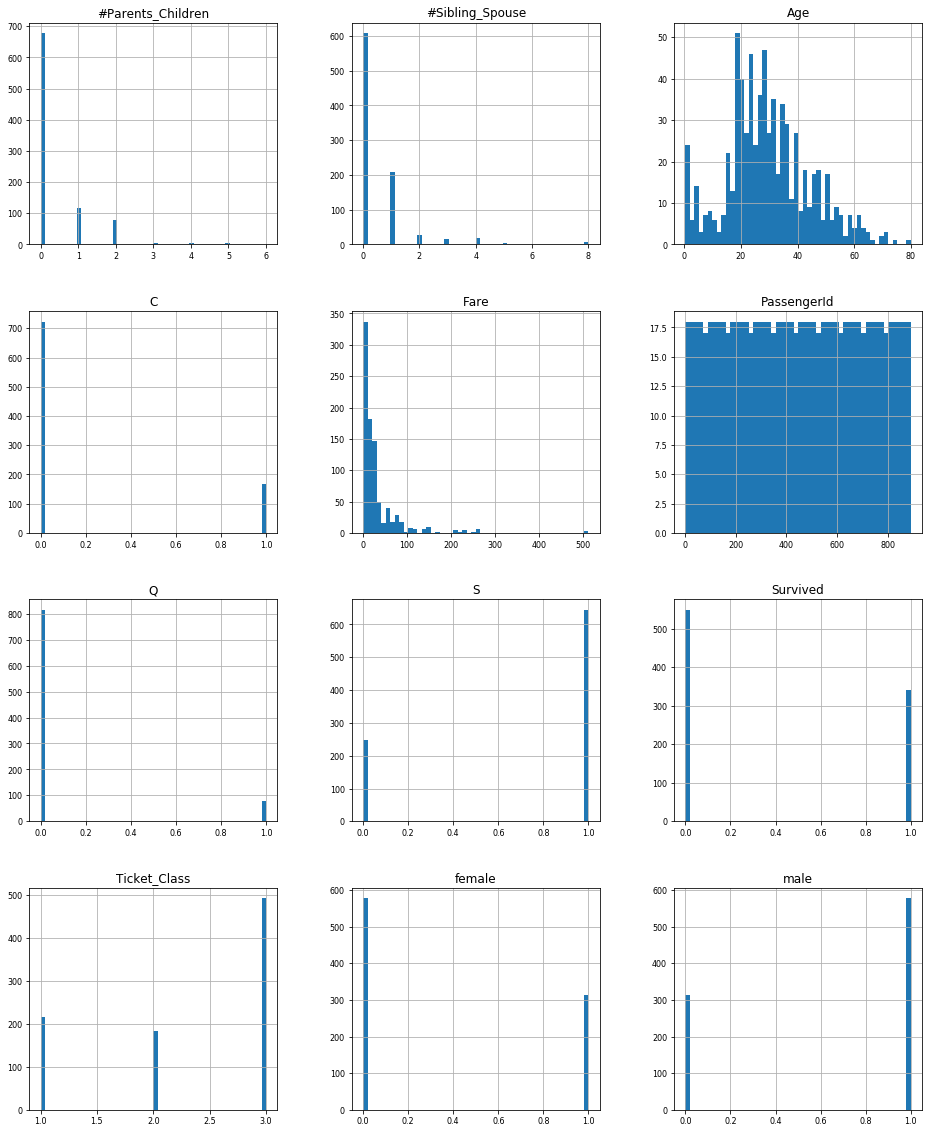

In [424]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

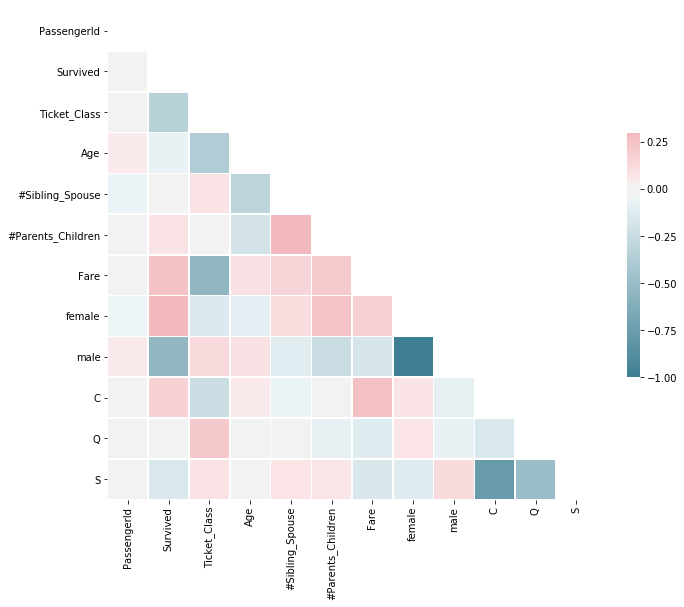

In [425]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Creat arrays and the response variable

In [426]:
X = train.drop('Survived', axis=1).values
y = train['Survived'].values

# Construct Pipeline

#### Define steps

In [427]:
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
         ('random_forest', RandomForestClassifier())]

In [428]:
pipeline = Pipeline(steps)

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [430]:
fit_pipeline = pipeline.fit(X_train, y_train)

#### Test dataset

In [431]:
test = preprocess_data(test_df)
test.head()

,PassengerId,Ticket_Class,Age,#Sibling_Spouse,#Parents_Children,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [432]:
y_prediction = fit_pipeline.predict(X_test)

##### Print prediction

In [433]:
print(y_prediction)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


#### Test predictions

In [434]:
report = sklearn.metrics.classification_report( y_test, y_prediction )
print(report)

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       157
          1       0.84      0.66      0.74       111

avg / total       0.81      0.81      0.80       268



### Model Accuracy

In [435]:
score = pipeline.score(X_test, y_test)
score_df = pd.Series({'score': score})
print(score_df)

score    0.80597
dtype: float64


### Generate reqirements.txt

In [436]:
pip freeze > requirements.txt


The following command must be run outside of the IPython shell:

    $ pip freeze > requirements.txt

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


# Reference
https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html
https://seaborn.pydata.org/examples/many_pairwise_correlations.html
https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/
https://www.youtube.com/watch?v=URdnFlZnlaE
http://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf
https://medium.com/@yanhann10/a-brief-view-of-machine-learning-pipeline-in-python-5f50b941fca8
https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/
https://rstudio-pubs-static.s3.amazonaws.com/319512_844d18c1181a4f17a5430ea650b3a8c2.html